## Importing Libraries

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


## Test set Image Processing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 420 files belonging to 4 classes.
['resized_bark_eating_caterpillar', 'resized_gummosis', 'resized_leaf_eating_caterpillar', 'resized_shootborer']


## Loading Model

cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single image

In [15]:
import cv2
print(cv2.__version__)


4.10.0


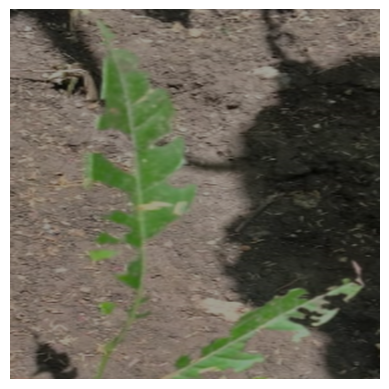

In [17]:
import cv2
import matplotlib.pyplot as plt

# Path to your image
image_path = 'test/leaf_eating_caterpillar/1_leaf_eating_caterpillar_3_brightness_1.png'

# Read the image
image = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV reads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


## Testing Model

In [20]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


In [22]:
print(predictions)

[[3.2555545e-05 8.0922600e-03 9.8502666e-01 6.8485728e-03]]


In [24]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


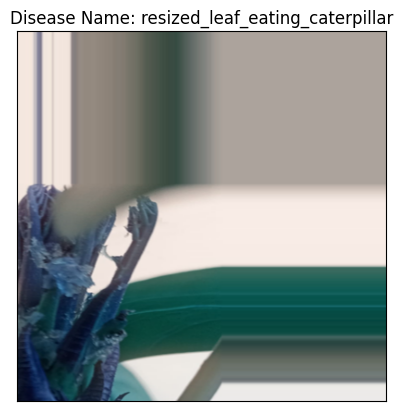

In [38]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

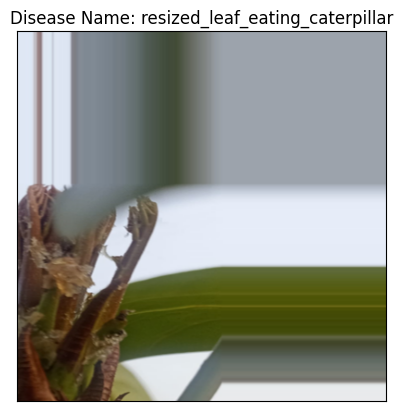

In [32]:
# import cv2
# import matplotlib.pyplot as plt

# # Assuming 'image_path' is defined as the path to your image
# image_path = 'test/gummosis/9_infected_gummosis_9_shift_1.png'

# # Read the image using OpenCV
# img = cv2.imread(image_path)

# # Convert BGR to RGB format (OpenCV uses BGR)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Assuming 'result_index' and 'class_name' are already defined
# model_prediction = class_name[result_index]

# # Display the image and prediction
# plt.imshow(img_rgb)
# plt.title(f"Disease Name: {model_prediction}")
# plt.xticks([])  # Remove x ticks
# plt.yticks([])  # Remove y ticks
# plt.show()
